In [115]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn import cross_validation as cv
%matplotlib inline

In [2]:
ratings = pd.read_csv('../../../data/movies/ratings.csv')
movies = pd.read_csv('../../../data/movies/movies.csv')

In [3]:
movies.head(), movies.shape

(   movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  , (27278, 3))

In [4]:
movies['title_format'] = movies['title'].apply(lambda x: re.search('\(\d+\)',x))

In [5]:
movies[movies['title_format'].isnull()] ##some do not have the year data in them

,movieId,title,genres,title_format
10593,40697,Babylon 5,Sci-Fi,None
15646,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,None
17341,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary,None
22368,107434,Diplomatic Immunity (2009– ),Comedy,None
22669,108548,"Big Bang Theory, The (2007-)",Comedy,None
22679,108583,Fawlty Towers (1975-1979),Comedy,None
23617,112406,Brazil: In the Shadow of the Stadiums,Documentary,None
23824,113190,Slaying the Badger,Documentary,None
24286,115133,Tatort: Im Schmerz geboren,Crime,None
24412,115685,National Theatre Live: Frankenstein,Drama|Fantasy,None


In [6]:
movies = movies[movies['title_format'].isnull()==False] ##remove movies with no year data

In [7]:
movies.shape

(27256, 4)

In [8]:
movies['title_name'] = movies['title'].apply(lambda x: x[:re.search('\(\d+\)',x).start()])
movies['year'] = movies['title'].apply(lambda x: re.search('\(\d+\)',x).group(0))
movies['released_year'] = movies['year'].apply(lambda x: re.search('\d+',x).group()) 

In [9]:
movies_by_year = movies['released_year'].value_counts().reset_index()
movies_by_year.columns = ['released_year','number_of_movies']
movies_by_year = movies_by_year.sort_values(by='released_year')

In [10]:
movies_by_year.head()

,released_year,number_of_movies
112,06,1
111,1891,1
120,1893,1
107,1894,2
108,1895,2


In [11]:
movies.shape, movies_by_year.shape

((27256, 7), (121, 2))

In [12]:
movies = movies[movies.released_year.isin(['06','69','500'])==False]
movies_by_year = movies_by_year[movies_by_year.isin(['06','69','500'])==False] ##remove invalid data

In [13]:
movies.shape, movies_by_year.shape

((27253, 7), (121, 2))

(array([ 1880.,  1900.,  1920.,  1940.,  1960.,  1980.,  2000.,  2020.]),
 <a list of 8 Text xticklabel objects>)

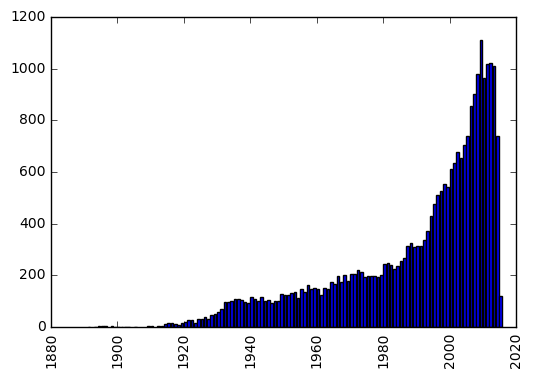

In [14]:
plot = plt.bar(movies_by_year.released_year, movies_by_year.number_of_movies)
plt.xticks(rotation=90)  ##movies by year

In [15]:
movies_genre = movies.genres.str.get_dummies('|')

In [16]:
movies_genre.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
df_movies = pd.merge(movies, movies_genre, how='inner', left_index=True, right_index=True)
df_movies.head() ##237 movies with no genre listed

,movieId,title,genres,title_format,title_name,year,released_year,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,<_sre.SRE_Match object at 0x7f7b9ae49510>,Toy Story,(1995),1995,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,<_sre.SRE_Match object at 0x7f7b9ae494a8>,Jumanji,(1995),1995,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,<_sre.SRE_Match object at 0x7f7b9ae49440>,Grumpier Old Men,(1995),1995,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,<_sre.SRE_Match object at 0x7f7b9ae49578>,Waiting to Exhale,(1995),1995,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,<_sre.SRE_Match object at 0x7f7b9ae495e0>,Father of the Bride Part II,(1995),1995,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_movies[df_movies['(no genres listed)']==1]

,movieId,title,genres,title_format,title_name,year,released_year,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
16574,83773,Away with Words (San tiao ren) (1999),(no genres listed),<_sre.SRE_Match object at 0x7f7b9b63b5e0>,Away with Words (San tiao ren),(1999),1999,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16589,83829,Scorpio Rising (1964),(no genres listed),<_sre.SRE_Match object at 0x7f7b9b63bbf8>,Scorpio Rising,(1964),1964,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16764,84768,Glitterbug (1994),(no genres listed),<_sre.SRE_Match object at 0x7f7b9b6405e0>,Glitterbug,(1994),1994,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17080,86493,"Age of the Earth, The (A Idade da Terra) (1980)",(no genres listed),<_sre.SRE_Match object at 0x7f7b9b648ac0>,"Age of the Earth, The (A Idade da Terra)",(1980),1980,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17243,87061,Trails (Veredas) (1978),(no genres listed),<_sre.SRE_Match object at 0x7f7b9b5ccf38>,Trails (Veredas),(1978),1978,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18246,91246,Milky Way (Tejút) (2007),(no genres listed),<_sre.SRE_Match object at 0x7f7b9b5e7578>,Milky Way (Tejút),(2007),2007,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18566,92435,"Dancing Hawk, The (Tanczacy jastrzab) (1978)",(no genres listed),<_sre.SRE_Match object at 0x7f7b9b5efbf8>,"Dancing Hawk, The (Tanczacy jastrzab)",(1978),1978,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18606,92641,Warsaw Bridge (Pont de Varsòvia) (1990),(no genres listed),<_sre.SRE_Match object at 0x7f7b9b5f0cc8>,Warsaw Bridge (Pont de Varsòvia),(1990),1990,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18984,94431,"Ella Lola, a la Trilby (1898)",(no genres listed),<_sre.SRE_Match object at 0x7f7b9b5fabf8>,"Ella Lola, a la Trilby",(1898),1898,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19015,94657,"Turkish Dance, Ella Lola (1898)",(no genres listed),<_sre.SRE_Match object at 0x7f7b9b5fb920>,"Turkish Dance, Ella Lola",(1898),1898,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
genre_list = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
              'Musical','Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
year_genre_movies = df_movies.groupby(['released_year'])[genre_list].sum()

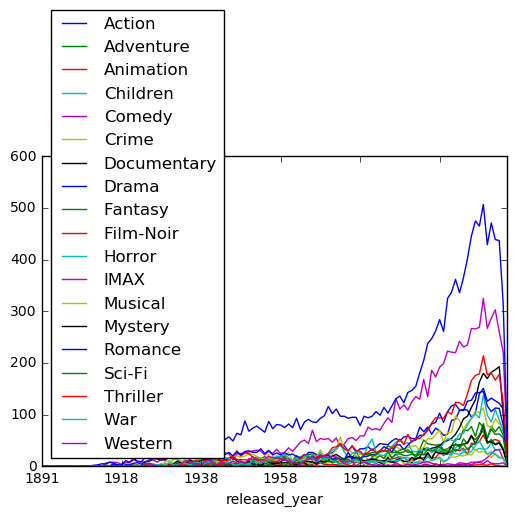

In [20]:
genreplot = year_genre_movies.plot() ##movies by genres and years they were released

In [21]:
for genre in genre_list:
    print genre + ': ' + str(year_genre_movies[genre].sum())

Action: 3519
Adventure: 2329
Animation: 1027
Children: 1139
Comedy: 8368
Crime: 2938
Documentary: 2467
Drama: 13337
Fantasy: 1411
Film-Noir: 330
Horror: 2611
IMAX: 196
Musical: 1035
Mystery: 1513
Romance: 4125
Sci-Fi: 1741
Thriller: 4177
War: 1194
Western: 676


In [22]:
ratings.shape

(20000263, 4)

In [25]:
average_rating = ratings.groupby('movieId')['rating'].mean()

In [26]:
average_rating = average_rating.reset_index()

In [27]:
average_rating.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [28]:
df_movies_rating = pd.merge(df_movies, average_rating, how='left', on='movieId')

In [29]:
df_movies_rating.tail()

,movieId,title,genres,title_format,title_name,year,released_year,(no genres listed),Action,Adventure,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
27248,131254,Kein Bund für's Leben (2007),Comedy,<_sre.SRE_Match object at 0x7f7b9b4d4648>,Kein Bund für's Leben,(2007),2007,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
27249,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,<_sre.SRE_Match object at 0x7f7b9b4d46b0>,"Feuer, Eis & Dosenbier",(2002),2002,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
27250,131258,The Pirates (2014),Adventure,<_sre.SRE_Match object at 0x7f7b9b4d4718>,The Pirates,(2014),2014,0,0,1,...,0,0,0,0,0,0,0,0,0,2.5
27251,131260,Rentun Ruusu (2001),(no genres listed),<_sre.SRE_Match object at 0x7f7b9b4d4780>,Rentun Ruusu,(2001),2001,1,0,0,...,0,0,0,0,0,0,0,0,0,3.0
27252,131262,Innocence (2014),Adventure|Fantasy|Horror,<_sre.SRE_Match object at 0x7f7b9b4d47e8>,Innocence,(2014),2014,0,0,1,...,1,0,0,0,0,0,0,0,0,4.0


In [30]:
for genre in genre_list:
    print genre, 'rating: ', df_movies_rating[df_movies_rating[genre]==1].rating.mean(), 'number of movies: ', \
          len(df_movies_rating[df_movies_rating[genre]==1])



Action rating:  2.97683354086 number of movies:  3519
Adventure rating:  3.07240749419 number of movies:  2329
Animation rating:  3.17709521251 number of movies:  1027
Children rating:  2.95560756975 number of movies:  1139
Comedy rating:  3.07418201523 number of movies:  8368
Crime rating:  3.16685282624 number of movies:  2938
Documentary rating:  3.43662821083 number of movies:  2467
Drama rating:  3.2620628153 number of movies:  13337
Fantasy rating:  3.09308425427 number of movies:  1411
Film-Noir rating:  3.44415083929 number of movies:  330
Horror rating:  2.69679576528 number of movies:  2611
IMAX rating:  3.29467040491 number of movies:  196
Musical rating:  3.18083448724 number of movies:  1035
Mystery rating:  3.13499663245 number of movies:  1513
Romance rating:  3.2055452952 number of movies:  4125
Sci-Fi rating:  2.88951055437 number of movies:  1741
Thriller rating:  3.01606878534 number of movies:  4177
War rating:  3.32113704318 number of movies:  1194
Western rating: 

In [31]:
ratings.shape

(20000263, 4)

In [32]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


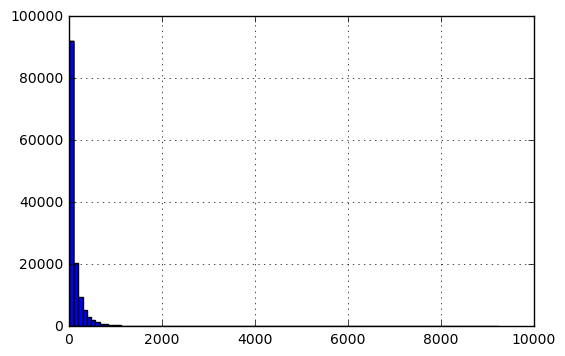

In [33]:
count_review_by_user = ratings.groupby('userId')['rating'].count()
count_review_by_user.hist(bins=100) ##movies reviewed by users, the majority have rated only few movies

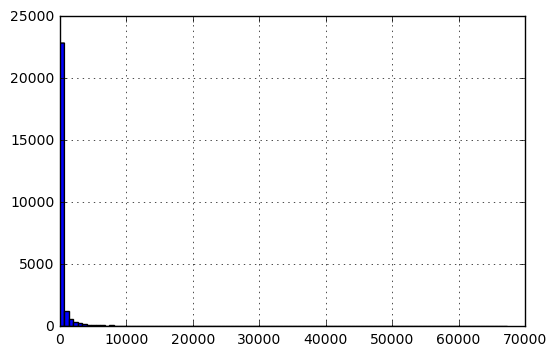

In [34]:
count_review_by_movie = ratings.groupby('movieId')['rating'].count()
count_review_by_movie.hist(bins=100) ##by movies

In [35]:
count_review_by_movie.describe()

count    26744.000000
mean       747.841123
std       3085.818268
min          1.000000
25%          3.000000
50%         18.000000
75%        205.000000
max      67310.000000
Name: rating, dtype: float64

In [36]:
count_review_by_user.describe()

count    138493.000000
mean        144.413530
std         230.267257
min          20.000000
25%          35.000000
50%          68.000000
75%         155.000000
max        9254.000000
Name: rating, dtype: float64

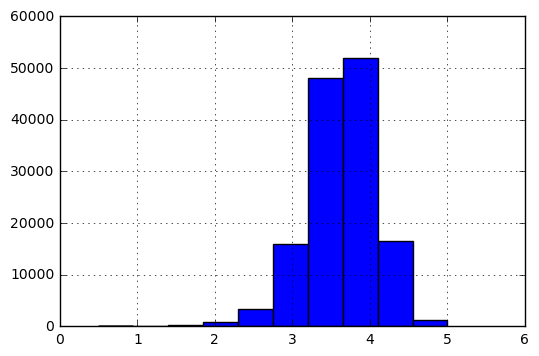

In [37]:
average_rating_by_user = ratings.groupby('userId')['rating'].mean()
average_rating_by_user.hist()

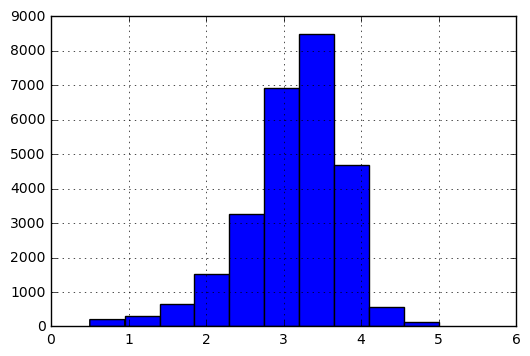

In [38]:
average_rating_by_movie = ratings.groupby('movieId')['rating'].mean()
average_rating_by_movie.hist()

In [39]:
##Average rating by user
print average_rating_by_user.mean()
##Average rating by movie
print average_rating_by_movie.mean()

3.62720862189
3.13319999013


In [40]:
count_review_by_user = count_review_by_user.reset_index()
count_review_by_movie = count_review_by_movie.reset_index()
average_rating_by_user = average_rating_by_user.reset_index()
average_rating_by_movie = average_rating_by_movie.reset_index()

In [41]:
count_review_by_user.columns = ['userId','count_rating_user']
count_review_by_movie.columns = ['movieId','count_rating_movie']
average_rating_by_user.columns = ['userId','average_rating_user']
average_rating_by_movie.columns = ['movieId','average_rating_movie']

In [42]:
df_rating = pd.merge(ratings, count_review_by_user, how='left', on='userId')
df_rating = pd.merge(df_rating, count_review_by_movie, how='left', on='movieId')
df_rating = pd.merge(df_rating, average_rating_by_user, how='left', on='userId')
df_rating = pd.merge(df_rating, average_rating_by_movie, how='left', on='movieId')

In [43]:
df_rating.head()

,userId,movieId,rating,timestamp,count_rating_user,count_rating_movie,average_rating_user,average_rating_movie
0,1,2,3.5,1112486027,175,22243,3.742857,3.211977
1,1,29,3.5,1112484676,175,8520,3.742857,3.952230
2,1,32,3.5,1112484819,175,44980,3.742857,3.898055
3,1,47,3.5,1112484727,175,43249,3.742857,4.053493
4,1,50,3.5,1112484580,175,47006,3.742857,4.334372


In [44]:
df_rating.count_rating_user.describe()

count    2.000026e+07
mean     5.115718e+02
std      6.633559e+02
min      2.000000e+01
25%      1.230000e+02
50%      2.960000e+02
75%      6.440000e+02
max      9.254000e+03
Name: count_rating_user, dtype: float64

In [45]:
df_rating.count_rating_movie.describe()

count    2.000026e+07
mean     1.348038e+04
std      1.411208e+04
min      1.000000e+00
25%      2.963000e+03
50%      8.505000e+03
75%      1.967400e+04
max      6.731000e+04
Name: count_rating_movie, dtype: float64

In [46]:
rating_subset = df_rating[(df_rating.count_rating_user >= 1500) & (df_rating.count_rating_movie >= 5000)]

In [47]:
rating_subset.shape, ratings.shape

((389724, 8), (20000263, 4))

In [48]:
len(rating_subset.userId.unique()), len(rating_subset.movieId.unique())

(581, 1005)

In [49]:
train_data, test_data = cv.train_test_split(rating_subset, test_size=0.25)

In [50]:
len(train_data.userId.unique()), len(test_data.userId.unique()), len(train_data.movieId.unique()), len(test_data.movieId.unique())

(581, 581, 1005, 1005)

In [51]:
train_data.head()

,userId,movieId,rating,timestamp,count_rating_user,count_rating_movie,average_rating_user,average_rating_movie
1582885,10678,54286,4.0,1211165373,1931,10798,3.077421,3.973097
4800674,32984,1103,3.5,1352577466,1735,5951,3.197983,3.812048
8925664,61696,4979,3.0,1190445723,1661,12513,3.504816,3.765044
19025190,131651,4995,3.0,1146763952,2313,21931,3.551232,3.919748
17138043,118534,2959,5.0,1073202947,1572,40106,3.864504,4.227123


In [52]:
ptrain = train_data.pivot(index='userId', columns='movieId', values='rating')

In [53]:
ptrain.head()

movieId,1,2,3,5,6,7,10,11,14,16,...,70286,71535,72998,73017,74458,78499,79132,80463,81591,81845
userId,,,,,,,,,,,,,,,,,,,,,
156,5.0,5.0,2.0,3.0,4.0,4.0,4.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,5.0,3.0,3.0,NaN,3.5,4.5,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,3.0,...,3.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN
775,4.5,2.0,3.5,1.0,NaN,3.0,4.5,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,4.0,4.0,2.0,NaN,4.0,3.0,1.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
train_user_index = pd.DataFrame(ptrain.index)
train_movies_index = pd.DataFrame(ptrain.columns)

In [55]:
ptest = test_data.pivot(index='userId', columns='movieId', values='rating')
ptest.head()

movieId,1,2,3,5,6,7,10,11,14,16,...,70286,71535,72998,73017,74458,78499,79132,80463,81591,81845
userId,,,,,,,,,,,,,,,,,,,,,
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,3.0,3.5,3.0,NaN,NaN,NaN,NaN,NaN
775,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
R = ptrain.fillna(0.0).copy().values
T = ptest.fillna(0.0).copy().values

In [57]:
I = R.copy()
I[I > 0] = 1
I[I == 0] = 0

I2 = T.copy()
I2[I2 > 0] = 1
I2[I2 == 0] = 0

In [58]:
def prediction(P,Q):
    return np.dot(P.T,Q)

In [59]:
lmbda = 0.1 
k = 20  
m, n = R.shape  
n_iter = 100  
step_size = 0.01

P = 3 * np.random.rand(k,m) 
Q = 3 * np.random.rand(k,n)

In [60]:
def rmse(I,R,Q,P):
    return np.sqrt(np.sum((I * (R - prediction(P,Q)))**2)/len(R[R > 0]))

In [61]:
R.nonzero()

(array([  0,   0,   0, ..., 580, 580, 580]),
 array([   0,    1,    2, ..., 1001, 1003, 1004]))

In [62]:
R.shape

(581, 1005)

In [63]:
Q.shape, P.shape

((20, 1005), (20, 581))

In [64]:
train_errors = []
test_errors = []
users, items = R.nonzero()      
for iter in xrange(n_iter):
    for u, i in zip(users, items):
        e = R[u, i] - prediction(P[:,u],Q[:,i])  
        P[:,u] += step_size * ( e * Q[:,i] - lmbda * P[:,u])
        Q[:,i] += step_size * ( e * P[:,u] - lmbda * Q[:,i])  
    train_rmse = rmse(I,R,Q,P) 
    test_rmse = rmse(I2,T,Q,P) 
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

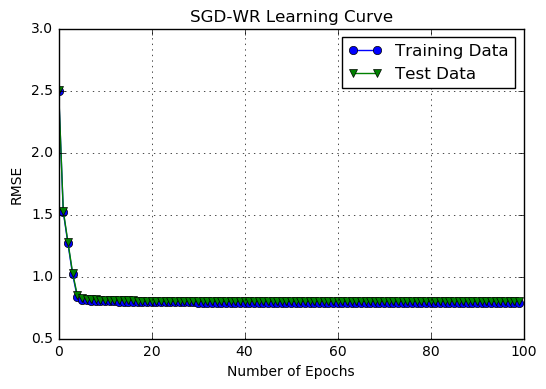

In [65]:
plt.plot(range(n_iter), train_errors, marker='o', label='Training Data');
plt.plot(range(n_iter), test_errors, marker='v', label='Test Data');
plt.title('SGD-WR Learning Curve')
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

In [66]:
R = pd.DataFrame(R)
R_hat=pd.DataFrame(prediction(P,Q))

In [81]:
r = pd.DataFrame(data=R.loc[16,R.loc[16,:] > 0]).head(n=5)
r['Prediction'] = R_hat.loc[16,R.loc[16,:] > 0]
r.columns = ['Actual Rating', 'Predicted Rating']
r

,Actual Rating,Predicted Rating
4,4.0,3.512829
5,2.0,2.349109
6,4.0,2.808460
7,3.5,2.832260
9,4.0,3.494478


In [82]:
P.shape, Q.shape

((20, 581), (20, 1005))

In [83]:
R.loc[22,:].head()

0    0.0
1    3.0
2    2.5
3    3.0
4    0.0
Name: 22, dtype: float64

In [70]:
R_hat.loc[22,:].head()

0    3.960114
1    3.155338
2    3.006806
3    2.848840
4    3.497450
Name: 22, dtype: float64

In [84]:
T = pd.DataFrame(T)
T_hat=pd.DataFrame(prediction(P,Q))

In [85]:
T.loc[22,:].head()

0    4.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 22, dtype: float64

In [86]:
T_hat.loc[22,:].head()

0    3.960114
1    3.155338
2    3.006806
3    2.848840
4    3.497450
Name: 22, dtype: float64

In [87]:
train_user_index.loc[22,:].values[0]

4967

In [88]:
train_data[train_data.userId==train_user_index.loc[22,:].values[0]].count()

userId                  450
movieId                 450
rating                  450
timestamp               450
count_rating_user       450
count_rating_movie      450
average_rating_user     450
average_rating_movie    450
dtype: int64

In [89]:
predicted_ratings = pd.DataFrame(data=R_hat.loc[22,R.loc[22,:] == 0])

In [90]:
predicted_ratings.shape

(555, 1)

In [100]:
top_20_reco = predicted_ratings.sort_values(by=22,ascending=False).head(20)

In [101]:
top_20_reco

,22
86,4.101107
167,4.098291
234,4.093336
317,4.047920
329,4.045342
568,4.034006
337,4.002520
241,3.974228
799,3.969264
27,3.963538


In [102]:
top_20_reco.index.tolist()

[86,
 167,
 234,
 317,
 329,
 568,
 337,
 241,
 799,
 27,
 320,
 0,
 99,
 324,
 1004,
 316,
 325,
 285,
 256,
 327]

In [106]:
pr = movies[movies.movieId.isin(top_20_reco.index.tolist())]

In [107]:
pr

,movieId,title,genres,title_format,title_name,year,released_year
26,27,Now and Then (1995),Children|Drama,<_sre.SRE_Match object at 0x7f7b9ae49ed0>,Now and Then,(1995),1995
85,86,White Squall (1996),Action|Adventure|Drama,<_sre.SRE_Match object at 0x7f7b9ae857e8>,White Squall,(1996),1996
97,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,<_sre.SRE_Match object at 0x7f7b9ae85cc8>,Heidi Fleiss: Hollywood Madam,(1995),1995
165,167,Feast of July (1995),Drama,<_sre.SRE_Match object at 0x7f7b9b78b988>,Feast of July,(1995),1995
231,234,Exit to Eden (1994),Comedy,<_sre.SRE_Match object at 0x7f7b9b78d578>,Exit to Eden,(1994),1994
238,241,Fluke (1995),Children|Drama,<_sre.SRE_Match object at 0x7f7b9b78d850>,Fluke,(1995),1995
253,256,Junior (1994),Comedy|Sci-Fi,<_sre.SRE_Match object at 0x7f7b9b78de68>,Junior,(1994),1994
282,285,Beyond Bedlam (1993),Drama|Horror,<_sre.SRE_Match object at 0x7f7b9b78eac0>,Beyond Bedlam,(1993),1993
313,316,Stargate (1994),Action|Adventure|Sci-Fi,<_sre.SRE_Match object at 0x7f7b9b78f7e8>,Stargate,(1994),1994
314,317,"Santa Clause, The (1994)",Comedy|Drama|Fantasy,<_sre.SRE_Match object at 0x7f7b9b78f850>,"Santa Clause, The",(1994),1994


In [104]:
train_user_index.iloc[22,:]

userId    4967
Name: 22, dtype: int64

In [108]:
act = pd.merge(ratings[ratings.userId==4967].sort_values(by='rating',ascending=False).head(20), movies, on='movieId', how='left')

In [111]:
act.title_name

0                  Labyrinth 
1                     Willow 
2           Band of Brothers 
3        From Dusk Till Dawn 
4                  Crow, The 
5        Breakfast Club, The 
6                Hoodwinked! 
7             Lost Boys, The 
8     Muppet Treasure Island 
9          Empire of the Sun 
10              Goonies, The 
11        Rugrats Movie, The 
12       Princess Bride, The 
13                     Red 2 
14                   Hackers 
15                 Star Trek 
16               Castle, The 
17               Crackerjack 
18                  Sin City 
19         Longest Yard, The 
Name: title_name, dtype: object

In [114]:
pr.title_name

26                       Now and Then 
85                       White Squall 
97      Heidi Fleiss: Hollywood Madam 
165                     Feast of July 
231                      Exit to Eden 
238                             Fluke 
253                            Junior 
282                     Beyond Bedlam 
313                          Stargate 
314                 Santa Clause, The 
317                            Suture 
320                    Sum of Us, The 
321    National Lampoon's Senior Trip 
323                         Tank Girl 
325            Star Trek: Generations 
333       What's Eating Gilbert Grape 
563                Bhaji on the Beach 
786                  Frighteners, The 
985                  Glimmer Man, The 
Name: title_name, dtype: object